In [2]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
'patch.edgecolor': '#f2f1ec'
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

In [5]:
df = pd.read_csv('../data/petfinder-adoption-prediction/eda/df_eda.csv')
df.columns

Index(['type', 'gender', 'maturitysize', 'furlength', 'sterilized', 'health',
       'adoptionspeed', 'color_pattern', 'breed_type', 'vaccinated_dewormed',
       'fee_bin', 'age_bin', 'photoamt_11', 'description_char'],
      dtype='object')

In [70]:
# Line plot
df["adop_slowfast"] = df["adoptionspeed"]
df["adop_slowfast"] = df["adop_slowfast"].replace(2,1)
df["adop_slowfast"] = df["adop_slowfast"].replace(3,2)
df["adop_slowfast"] = df["adop_slowfast"].replace(4,2)


In [62]:
li = []
for element in df.description_char:
    if element < 50:
        li.append(0)
    elif 50 <= element < 150:
        li.append(50)
    elif 150 <= element < 250:
        li.append(150)
    elif 250 <= element < 500:
        li.append(250)
    elif 500 <= element < 1000:
        li.append(500)
    elif element > 1000:
        li.append(1000)
    
df["desc_bin"] = li

In [69]:
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index")

adop_slowfast,1,2
desc_bin,,
0,0.705596,0.294404
50,0.716661,0.283339
150,0.726364,0.273636
250,0.746245,0.253755
500,0.752202,0.247798
1000,0.781369,0.218631


<Axes: xlabel='desc_bin'>

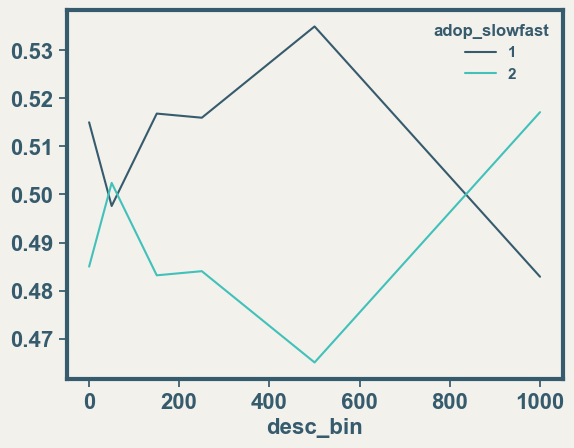

In [71]:
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index").plot.line()

In [74]:
df.adop_slowfast.value_counts(normalize=True)

adop_slowfast
1    0.513013
2    0.486987
Name: proportion, dtype: float64

In [ ]:
desc_ct = pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index")
desc_ct = desc_ct.reset_index()
desc_ct = pd.melt(desc_ct, id_vars='description_char', var_name='adoptionspeed', value_name='value')
desc_ct